#### [대구 지하철]


- 2024.07.24 판다스 시각화 프로젝트

- 가제: 대구지하철 호선도에 따른 정보들 파헤치기

* 1. 메인데이터 => 승하차정보
(0)   1. 1,2,3호선별 해마다 전체 승객률
   
   * 2. (최근 5년간) 2019년 ~ 2024년 1,2,3호선별 가장 많이 타고 내리는 곳 (top5)



2. * (1) 공기질 데이터 --> 역별 사용인구에 따른 대기질 확인 => 공기청정기, 공조설비 설치 현황 대조
   * (2) 주변시설 (역주변), 역세권 데이터 --> 실제로 유동인구와 역세권 데이터가 부합하는지 확인
   * (3) 공공시설 (휠체어,엘리베이터,자동심장) 데이터 --> 유동인구에 따른 노약자 편의시설 지원여부
   * (4) 시설물 사용량 (물, 돈) --> 매년 총 승차인원별 수입 추세, 물 사용량 추세
      1호선, 2호선, 3호선 별 해마다 수입 상승률






In [54]:
# 모듈로딩
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np


In [55]:

# 데이터 로드
rawDF = pd.read_csv(r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\대구교통공사_월별하차인원_20240531.csv',
                    encoding='cp949')

# 2024년 행 데이터 삭제
rawDF.drop(index=rawDF.index[-5:], inplace=True)



year_group_Df = rawDF.groupby("년")
year_group_Df.get_group(2006)


sum_year = dict(zip( rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()) ) ) 

for year in rawDF["년"].unique():
    sum_year[year] = year_group_Df.get_group(year).sum()[2:].tolist()


# 연도별 역별 하차인원 총합 DF 생성

year_out_DF = pd.DataFrame( sum_year, index=rawDF.columns[2:])
year_out_DF_final = year_out_DF.T.copy()


# 1호선, 2호선, 3호선 DF 구분
first_line = year_out_DF_final.loc[:,'설화명곡':'안심']
second_line = year_out_DF_final.loc[:, '문양':'영남대']
third_line = year_out_DF_final.loc[:, '칠곡경대병원':'용지']

# 모든 호선 DF 2015년 - 2023년도 데이터만 남기기

# 1호선, 2호선, 3호선
first_pie = first_line.loc[2015:, :]
second_pie = second_line.loc[2015:, :]
third_pie = third_line.loc[2015:, :]

first_tot = first_pie.sum(axis=0).sum()
second_tot = second_pie.sum(axis=0).sum()
third_tot = third_pie.sum(axis=0).sum()

tot_list = [first_tot, second_tot, third_tot]
tot_list

[583885860, 504604458, 215197685]

In [56]:
# 데이터 준비(전동 휠체어)
data=r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\대구교통공사_역사별 전동휠체어 충전기 정보_20220830.csv'

In [57]:
# 결측치 없어서  정리 필요 없음.

In [58]:
# 불러오기
dataDF=pd.read_csv(data,encoding='cp949')
dataDF

,호선,설치역,지상_지하,층,상세위치,충전설비수,동시충전,이용요금,역 주소,역 전화번호
0,1,설화명곡,지하,1,E/L 3호기 옆,1,2,무료,대구광역시 달성군 화원읍 비슬로 2476,053-634-2674
1,1,화원,지하,1,E/L 3호기 옆,1,1,무료,대구광역시 달성군 화원읍 비슬로 지하2600,053-634-5125
2,1,대곡,지하,2,화장실 앞,1,2,무료,대구광역시 달서구 비슬로 지하2718 (대곡동),053-644-7723
3,1,진천,지하,1,대합실,1,2,무료,대구광역시 달서구 월배로 지하76 (진천동),053-642-7723
4,1,월배,지하,1,E/L 1호기 옆,1,1,무료,대구광역시 달서구 월배로 지하143 (진천동),053-642-7732
...,...,...,...,...,...,...,...,...,...,...
86,3,황금,지상,2,대합실,1,1,무료,대구광역시 수성구 동대구로 100(두산동),053-640-7611
87,3,수성못,지상,2,대합실,1,1,무료,대구광역시 수성구 동대구로 14(지산동),053-640-7611
88,3,지산,지상,1,대합실,1,1,무료,대구광역시 수성구 지범로 100(지산동),053-640-7611
89,3,범물,지상,2,대합실,1,1,무료,대구광역시 수성구 지범로 194(범물동),053-640-7611


In [59]:
# 전동 휠체어 호선 별 충전설비수 합  알아내기
amugena = dataDF.groupby('호선')['충전설비수'].sum().reset_index()
print(amugena)
print(type(amugena))

   호선  충전설비수
0   1     32
1   2     30
2   3     30
<class 'pandas.core.frame.DataFrame'>


In [60]:
#컬럼 
# amugena.columns

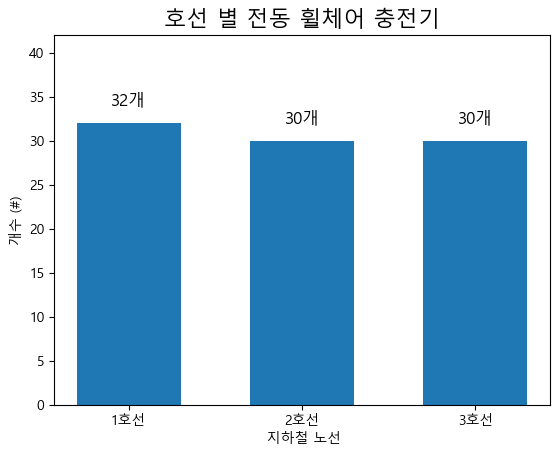

In [61]:
#전동 휠체어 충전기 시각화
bar1 = plt.bar([1,2,3], amugena["충전설비수"], width=0.6)
plt.xticks([1,2,3], labels=["1호선", "2호선", "3호선"])
plt.bar_label(bar1, padding=10, fontsize=12, fmt='{:.0f}개')
plt.title("호선 별 전동 휠체어 충전기", fontsize=16)
plt.ylim(bottom=0, top=max(amugena
["충전설비수"])+ 10)
plt.ylabel("개수 (#)")
plt.xlabel(' 지하철 노선')
plt.show()


In [62]:

#charging_stations_per_station = data.groupby('설치역')['충전설비수'].sum().reset_index()
#설치역이랑 충전설비수 뽑기
설치역충전설비수=dataDF.groupby('설치역')['충전설비수'].sum().reset_index()

In [63]:
# 설치역충전설비수

In [64]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm 
from matplotlib import rc
# 적용할 폰트 파일
FONT_FILE= r'C:\Windows\Fonts\malgun.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로은 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [65]:
def set_customFont(font_path):
    # 한글폰트 설정 => 폰트 매니저 모듈
    from matplotlib import font_manager as fm, rc

    # 적용할 폰트 파일
    Font_File=r'C:\Windows\Fonts\malgun.ttf'

    # 폰트 패밀리 이름 가져오기
    font_name=fm.FontProperties(fname=Font_File).get_name()

    # 새로운 폰트 패밀리 이름 지정
    rc('font',family=font_name)

set_customFont(r'C:\Windows\Fonts\malgun.ttf') 

In [66]:
#시각화

# plt.figure(figsize=(12, 8))
# plt.bar(설치역충전설비수['설치역'], 설치역충전설비수['충전설비수'])
# plt.xlabel('설치역')
# plt.ylabel('충전설비수')
# plt.title('설치역별 충전설비수')
# plt.xticks(rotation=45)
# plt.show()


In [67]:
dataDF[dataDF['호선'] == 1]['충전설비수'].sum()

32

In [68]:
dataDF[dataDF['호선'] == 2]['충전설비수'].sum()

30

In [69]:
dataDF[dataDF['호선'] == 3]['충전설비수'].sum()

30

In [70]:
dataDF['상세위치'].unique()

array(['E/L 3호기 옆 ', 'E/L 3호기 옆', '화장실 앞', '대합실', 'E/L 1호기 옆', '화장실 입구',
       '역무실 옆', 'E/L 4호기 옆', '2발매기 옆', '역무실 앞', '1번출구 앞', '계단 뒤', '쉼터 옆',
       '미술협회사무실 옆 ', '대합실 전시공간', '영남대방면 E/V옆', 'E/L 1호기 앞', 'E마트 편의점옆',
       '대합실 화장실 앞', '각 역무실 맞은편', '전기실 출입구', '대합실 ', '대합실 쉼터 내'],
      dtype=object)

In [71]:
#심장충격기 데이터
data1=r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\대구교통공사_자동심장충격기 역사 설치현황_20231031(2016~2022).csv'

In [72]:
#DataFranme
data1DF=pd.read_csv(data1, encoding='cp949')
data1DF

,호선,설치역,설치층,설치장소,설치위치,품명,제조사,설치연도,관할보건소,역주소,역전화번호
0,1,설화명곡역,지하2층,대합실,게이트 앞,CU-SP1,씨유메디칼,2020,달성군보건소,대구 달성군 화원읍 비슬로 2476,053-643-2674
1,1,설화명곡역,지하3층,승강장,안심방면 4-4 방향,CU-SP1,씨유메디칼,2020,달성군보건소,대구 달성군 화원읍 비슬로 2476,053-643-2674
2,1,화원역,지하1층,대합실,수유실앞,CU-SP1,씨유메디칼,2020,달성군보건소,대구 달성군 화원읍 비슬로 지하2600,053-643-5125
3,1,화원역,지하3층,승강장,안심방면 3-4 방향,CU-SP1,씨유메디칼,2020,달성군보건소,대구 달성군 화원읍 비슬로 지하2600,053-643-5125
4,1,대곡역,지하2층,대합실,고객안내센터 앞,NT-180,오맥스,2017,달서구보건소,대구 달서구 비슬로 지하2718 (대곡동),053-644-7723
...,...,...,...,...,...,...,...,...,...,...,...
136,3,황금역,지상2층,대합실,남자장애인화장실 앞,CU-SP1,씨유메디칼,2020,수성구보건소,대구 수성구 동대구로 100(두산동),053-640-7611
137,3,수성못역,지상2층,대합실,사회복무요원 대기실 앞,HR-501-B,라디안큐바이오,2019,수성구보건소,대구 수성구 동대구로 14(지산동),053-640-7611
138,3,지산역,지상2층,대합실,남자장애인화장실 옆,CU-SP1,씨유메디칼,2020,수성구보건소,대구 수성구 지범로 100(지산동),053-640-7611
139,3,범물역,지상2층,대합실,게이트 옆,CU-SP1,씨유메디칼,2020,수성구보건소,대구 수성구 지범로 194(범물동),053-640-7611


In [73]:
#필요한 행 열 뽑기
tmp = data1DF.iloc[:,0:2]
tmp

,호선,설치역
0,1,설화명곡역
1,1,설화명곡역
2,1,화원역
3,1,화원역
4,1,대곡역
...,...,...
136,3,황금역
137,3,수성못역
138,3,지산역
139,3,범물역


In [74]:
#호선 별 그룹해서 합 
data_group = tmp.groupby(["호선"])
aaa = data_group.count()
aaa

,설치역
호선,
1,56
2,55
3,30


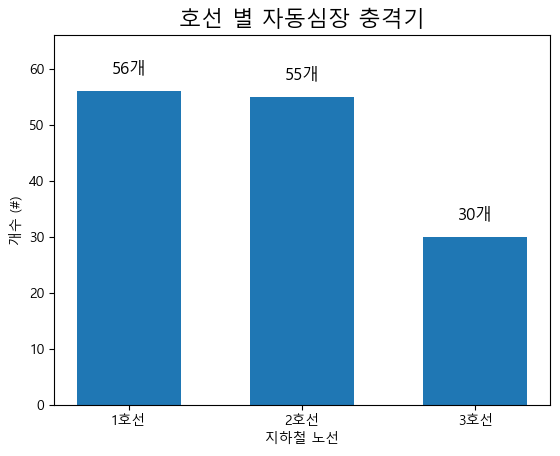

In [75]:
bar1 = plt.bar([1,2,3], aaa["설치역"], width=0.6)
plt.xticks([1,2,3], labels=["1호선", "2호선", "3호선"])

plt.bar_label(bar1, padding=10, fontsize=12, fmt='{:.0f}개')

plt.title("호선 별 자동심장 충격기", fontsize=16)
plt.ylim(bottom=0, top=max(aaa["설치역"])+ 10)
plt.ylabel("개수 (#)")
plt.xlabel('지하철 노선')
plt.show()

In [76]:
# 전체역에 자동심장충격기 총개수


data1DF_count=data1DF[data1DF['호선']==1].index.to_list()
len(data1DF_count)

56

In [77]:
data1DF['호선'].index

RangeIndex(start=0, stop=141, step=1)

In [78]:
#엘리베이터 자료 
data2= r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\국가철도공단_대구교통공사_엘리베이터_20231113.csv'

In [79]:
data2DF=pd.read_csv(data2,encoding='cp949')
data2DF

,철도운영기관명,선명,역명,출입구번호,상세위치,정원_인원,정원_중량(kg)
0,대구교통공사,1호선,각산,1.0,(1F) 1번 출입구 앞 (B1F) 발매기실 앞,13,1000
1,대구교통공사,1호선,각산,NaN,(B1F) 설화명곡역 방향 표 내는 곳 (B2F) 설화명곡역 방향 6-2 출입문 앞,13,1000
2,대구교통공사,1호선,각산,NaN,(B1F) 안심역 방향 표 내는 곳 (B2F) 안심역 방향 3-3 출입문 앞,13,1000
3,대구교통공사,1호선,각산,3.0,(1F) 2번/3번 출입구 사이 (B1F) 2번/3번 출입구 방향,13,1000
4,대구교통공사,1호선,교대,4.0,(1F) 4번 출입구 앞 (B2F) 2코너 표 내는 곳 옆,13,1000
...,...,...,...,...,...,...,...
299,대구교통공사,3호선,학정,NaN,(2F)표내는 곳 근처 (3F)칠곡경대병원역 승강장 1-2 앞,13,1000
300,대구교통공사,3호선,학정,NaN,(2F)표내는 곳 근처 (3F)용지역 방향 승강장 3-1 앞,13,1000
301,대구교통공사,3호선,황금,1.0,(1F) 1번 출입구 옆 (2F)대합실가는 통로,13,1000
302,대구교통공사,3호선,황금,NaN,(2F)대합실 (3F)어린이회관역 방향 3-1 출입문,13,1000


In [80]:
#모든 행,열은 '선명'이랑 '역명'만
tmp = data2DF.iloc[:,1:3]
tmp

,선명,역명
0,1호선,각산
1,1호선,각산
2,1호선,각산
3,1호선,각산
4,1호선,교대
...,...,...
299,3호선,학정
300,3호선,학정
301,3호선,황금
302,3호선,황금


In [81]:
tmp.columns

Index(['선명', '역명'], dtype='object')

In [82]:
# #tmp 임시로 변수명
data_group =tmp.groupby(["선명"])

In [83]:
#호선 별 그룹화!
elevator = data_group.count()
print(elevator)
print( type(elevator) )

      역명
선명      
1호선  117
2호선   84
3호선  103
<class 'pandas.core.frame.DataFrame'>


In [84]:
# Series 데이터 버전 / 안되는 버전
# 역명마다 해당하는 엘리베이터 수량 집계


'''
elevator_2 = data_group['선명'].value_counts()
print(elevator_2)
print( type(elevator_2))
'''

"\nelevator_2 = data_group['선명'].value_counts()\nprint(elevator_2)\nprint( type(elevator_2))\n"

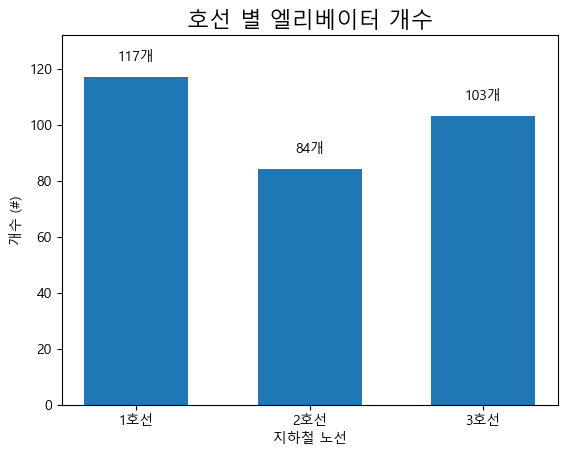

In [85]:
# 역명을 기준으로 정렬
bar1=plt.bar([1,2,3],elevator['역명'],width=0.6)
plt.xticks([1,2,3],labels=['1호선','2호선','3호선'])
plt.bar_label(bar1, padding=10, fontsize=10, fmt='{:.0f}개')

plt.title("호선 별 엘리베이터 개수", fontsize=16)
plt.ylim(bottom=0, top=max(elevator['역명'])+ 15)
plt.ylabel("개수 (#)")
plt.xlabel('지하철 노선')
plt.show()

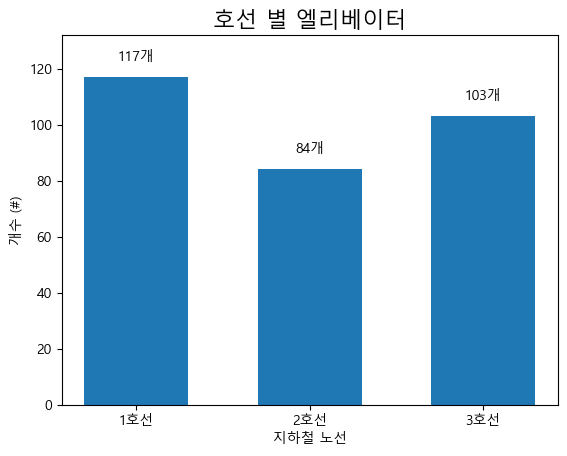

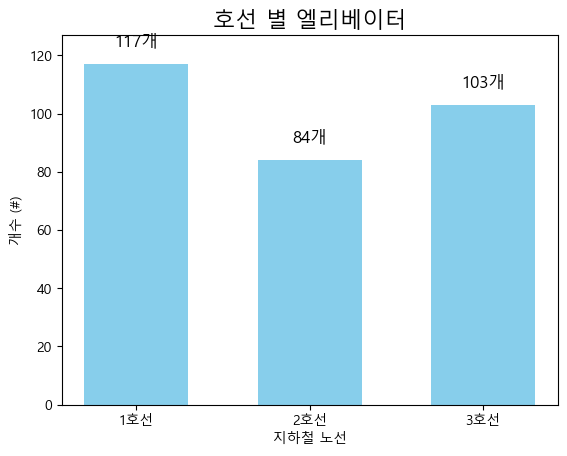

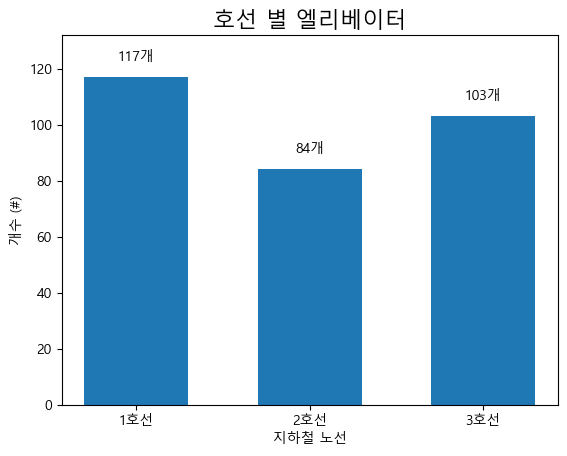

In [86]:


bar1=plt.bar([1,2,3],elevator['역명'],width=0.6)
plt.xticks([1,2,3],labels=['1호선','2호선','3호선'])
plt.bar_label(bar1, padding=10, fontsize=10, fmt='{:.0f}개')

plt.title("호선 별 엘리베이터", fontsize=16)
plt.ylim(bottom=0, top=max(elevator['역명'])+ 15)
plt.ylabel("개수 (#)")
plt.xlabel('지하철 노선')
plt.show()


import matplotlib.pyplot as plt

def plot_aed_installations(data, lines, title="호선 별 엘리베이터"):
    """
    호선 별 자동심장 충격기 설치 개수를 시각화하는 함수입니다.

    Parameters:
    - data: 리스트, 각 호선에 설치된 자동심장 충격기 개수
    - lines: 리스트, 호선 이름 또는 번호
    - title: 문자열, 그래프의 제목 (기본값은 "호선 별 자동심장 충격기")
    """
    # 막대 그래프 생성
    bar1 = plt.bar(range(len(data)), data, width=0.6,color='skyblue')

    # X축 눈금 설정
    plt.xticks(range(len(data)), labels=lines)

    # 막대 레이블 추가
    plt.bar_label(bar1, padding=10, fontsize=12, fmt='{:.0f}개')

    # 그래프 제목 설정
    plt.title(title, fontsize=16)

    # Y축 범위 설정
    plt.ylim(bottom=0, top=max(data) + 10)

    # Y축 레이블 설정
    plt.ylabel("개수 (#)")

    # X축 레이블 설정
    plt.xlabel('지하철 노선')

    # 그래프 표시
    plt.show()

# 사용 예시
data = [117,84,103]  # 각 호선에 설치된 자동심장 충격기 개수
lines = ["1호선", "2호선", "3호선"]  # 호선 이름 또는 번호
plot_aed_installations(data, lines)







# 역명을 기준으로 정렬
# line1_elevator = elevator.sort_values(by='엘리베이터 수량', ascending=False)
bar1=plt.bar([1,2,3],elevator['역명'],width=0.6)
plt.xticks([1,2,3],labels=['1호선','2호선','3호선'])
plt.bar_label(bar1, padding=10, fontsize=10, fmt='{:.0f}개')

plt.title("호선 별 엘리베이터", fontsize=16)
plt.ylim(bottom=0, top=max(elevator['역명'])+ 15)
plt.ylabel("개수 (#)")
plt.xlabel('지하철 노선')
plt.show()

In [87]:
# # 1호선 시각화
# plt.figure(figsize=(15, 5))
# plt.bar(line1['역명'], line1['엘리베이터 수량'], color='skyblue')
# plt.xticks(rotation=90)
# plt.xlabel('역명')
# plt.ylabel('엘리베이터 수량')
# plt.title('1호선 역별 엘리베이터 수량 분포')
# plt.tight_layout()
# plt.show()

In [88]:
elevator

,역명
선명,
1호선,117
2호선,84
3호선,103


C:\Users\LG\AppData\Local\Temp\ipykernel_17872\1635733892.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\LG\anaconda3\envs\py_39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


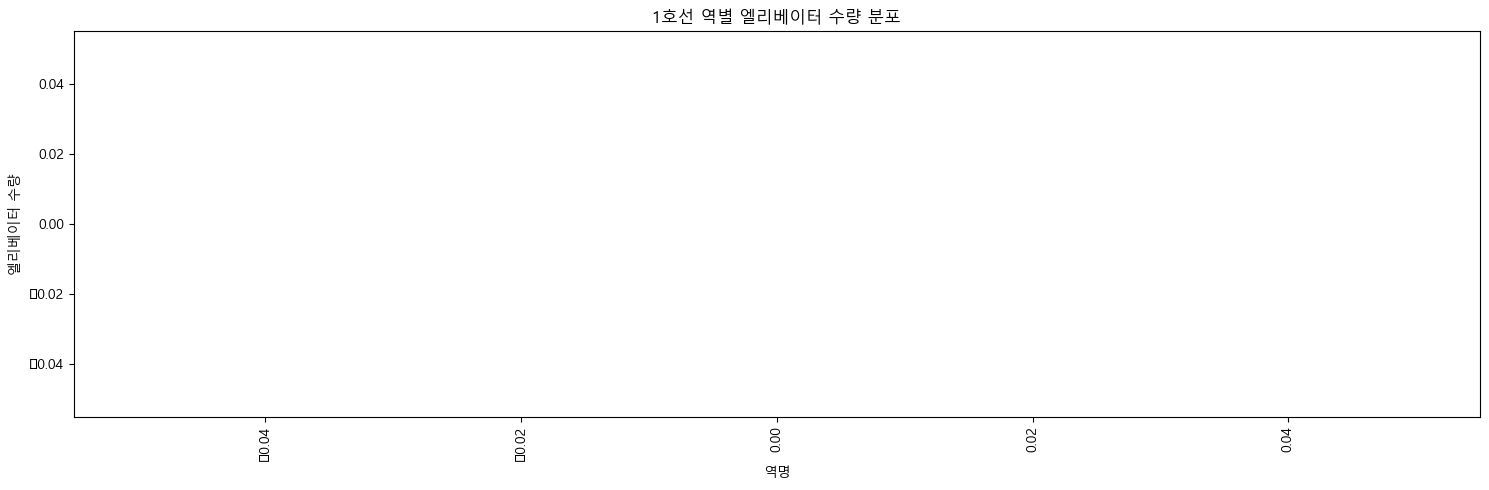

In [89]:
# 1, 2, 3 호선별로 데이터를 필터링하여 각각의 역별 엘리베이터 수량을 시각화

# 1호선 데이터 필터링
line1_df = elevator[elevator['역명'] == '1호선']
line1_elevator_count = line1_df['역명'].value_counts().reset_index()
line1_elevator_count.columns = ['역명', '엘리베이터 수량']


line1_elevator_count_sorted = line1_elevator_count.sort_values(by='엘리베이터 수량', ascending=False)

# # 2호선 데이터 필터링
# line2_df = data2[data2['선명'] == '2호선']
# line2_elevator_count = line2_df['역명'].value_counts().reset_index()
# line2_elevator_count.columns = ['역명', '엘리베이터 수량']

# # 3호선 데이터 필터링
# line3_df = data2[data2['선명'] == '3호선']
# line3_elevator_count = line3_df['역명'].value_counts().reset_index()
# line3_elevator_count.columns = ['역명', '엘리베이터 수량']

# 1호선 시각화
plt.figure(figsize=(15, 5))
plt.bar(line1_elevator_count['역명'], line1_elevator_count['엘리베이터 수량'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('역명')
plt.ylabel('엘리베이터 수량')
plt.title('1호선 역별 엘리베이터 수량 분포')
plt.tight_layout()
plt.show()

# # 2호선 시각화
# plt.figure(figsize=(15, 5))
# plt.bar(line2_elevator_count['역명'], line2_elevator_count['엘리베이터 수량'], color='lightgreen')
# plt.xticks(rotation=90)
# plt.xlabel('역명')
# plt.ylabel('엘리베이터 수량')
# plt.title('2호선 역별 엘리베이터 수량 분포')
# plt.tight_layout()
# plt.show()

# # 3호선 시각화
# plt.figure(figsize=(15, 5))
# plt.bar(line3_elevator_count['역명'], line3_elevator_count['엘리베이터 수량'], color='lightcoral')
# plt.xticks(rotation=90)
# plt.xlabel('역명')
# plt.ylabel('엘리베이터 수량')
# plt.title('3호선 역별 엘리베이터 수량 분포')
# plt.tight_layout()
# plt.show()

C:\Users\LG\AppData\Local\Temp\ipykernel_17872\3903712311.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


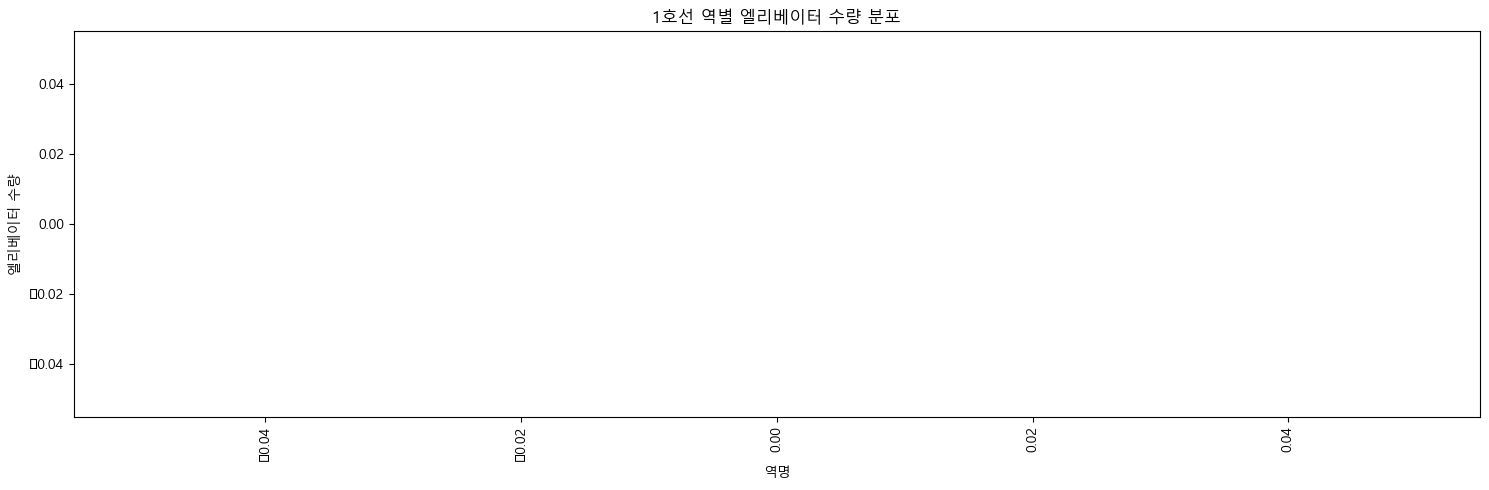

In [90]:
# 1호선 시각화
plt.figure(figsize=(15, 5))
plt.bar(line1_elevator_count['역명'], line1_elevator_count['엘리베이터 수량'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('역명')
plt.ylabel('엘리베이터 수량')
plt.title('1호선 역별 엘리베이터 수량 분포')
plt.tight_layout()
plt.show()


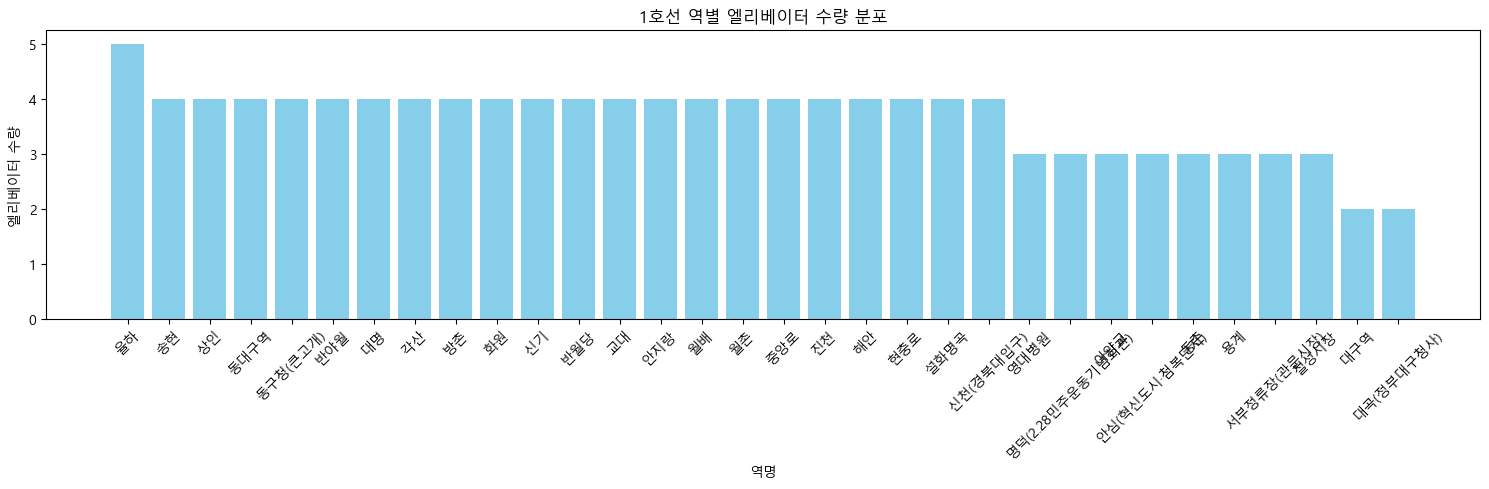

In [91]:

file_path = r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\국가철도공단_대구교통공사_엘리베이터_20231113.csv'

# CSV 파일 읽기 (인코딩 지정)
df = pd.read_csv(file_path, encoding='cp949')

# 1호선 데이터 필터링
line1_df = df[df['선명'] == '1호선']

# 1호선 역별 엘리베이터 수량 집계
line1_elevator_count = line1_df['역명'].value_counts().reset_index()
line1_elevator_count.columns = ['역명', '엘리베이터 수량']

# 역명을 기준으로 정렬
line1_elevator_count_sorted = line1_elevator_count.sort_values(by='엘리베이터 수량', ascending=False)

# 1호선 시각화
plt.figure(figsize=(15, 5))
plt.bar(line1_elevator_count_sorted['역명'], line1_elevator_count_sorted['엘리베이터 수량'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('역명')
plt.ylabel('엘리베이터 수량')
plt.title('1호선 역별 엘리베이터 수량 분포')
plt.tight_layout()
plt.show()

#### 위에꺼 정리 해서 함수로 만들기 -_- ㅋㅋㅋ 함수로해도 일단 기본 데이터 정리는 해야됨. .> 0 <하하하핳ㅠ

In [92]:
"""------
   같은거라서 함수 만들봄 ...

    Parameters:
    - data: 리스트, 각 호선에 설치된 자동심장 충격기 개수
    - lines: 리스트, 호선 이름 또는 번호
    - title: 문자열, 그래프의 제목"
    """
# 엘이베이터, 자동심장충격기 ,휠체어 3개다 같은 거라서 함수로 ㅎ
def plot_aed_installations(data, lines, title):
    bar1 = plt.bar(range(len(data)), data, width=0.6, color=['tomato','lightgreen','skyblue'])    # 막대 그래프 생성
    
    plt.xticks(range(len(data)), labels=lines)                         # X축 눈금 설정    
    plt.bar_label(bar1, padding=10, fontsize=12, fmt='{:.0f}개')      # 막대 레이블 추가
    plt.title(title, fontsize=16)              # 그래프 제목 설정
    plt.ylim(bottom=0, top=max(data) + 18)    # Y축 범위 설정
    plt.ylabel("개수 (#)")              # Y축 설정
    plt.xlabel('지하철 노선')             # X축  설정
    plt.show()                         # 그래프 표시


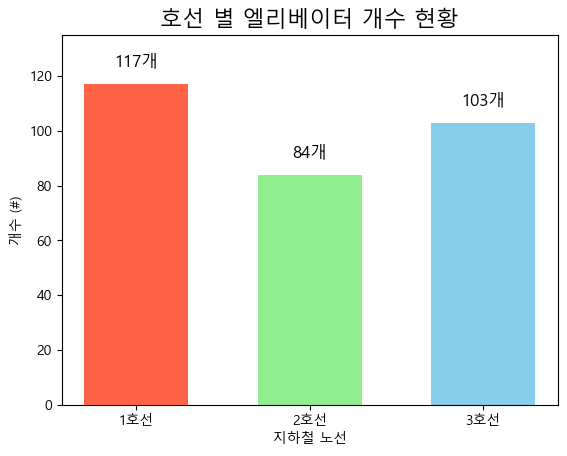

In [93]:
#엘리베이터 개수 

title= "호선 별 엘리베이터 개수 현황"
data = [117,84,103]                    # 각 호선에 설치된거 개수
lines = ["1호선", "2호선", "3호선"]       # 호선 이름 또는 번호
plot_aed_installations(data, lines,title) 

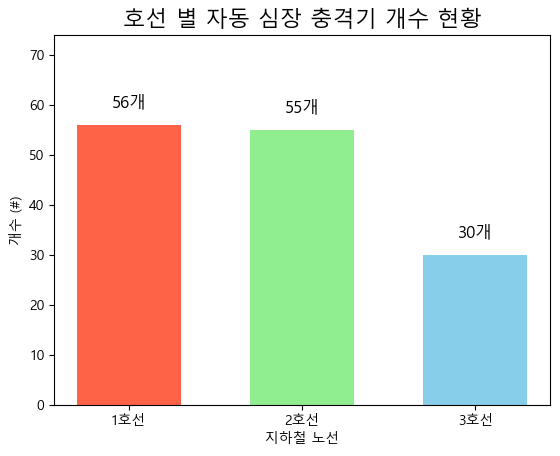

In [94]:
#자동 심장 충격기
title= "호선 별 자동 심장 충격기 개수 현황"
data = [56,55,30]                    # 각 호선에 설치된거 개수
lines = ["1호선", "2호선", "3호선"]       # 호선 이름 또는 번호
plot_aed_installations(data, lines,title)

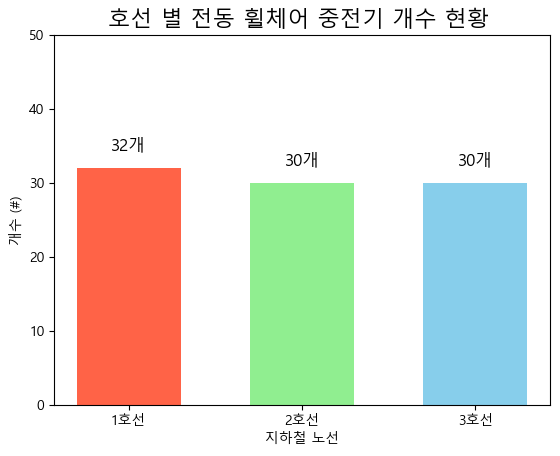

In [95]:
# 전동 휠체어
title= "호선 별 전동 휠체어 중전기 개수 현황 "
data = [32,30,30]                    # 각 호선에 설치된거 개수
lines = ["1호선", "2호선", "3호선"]       # 호선 이름 또는 번호
plot_aed_installations(data, lines,title)

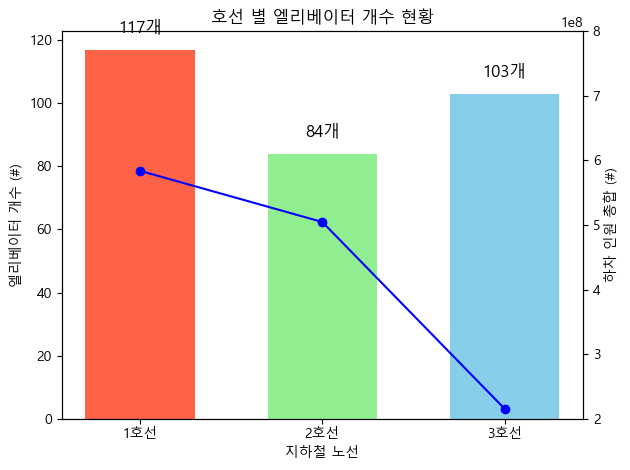

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
rawDF = pd.read_csv(r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\대구교통공사_월별하차인원_20240531.csv', encoding='cp949')

# 2024년 행 데이터 삭제
rawDF.drop(index=rawDF.index[-5:], inplace=True)

# 연도별 그룹화
year_group_Df = rawDF.groupby("년")

# 연도별 하차 인원 총합 계산
sum_year = dict(zip(rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()))) 

for year in rawDF["년"].unique():
    sum_year[year] = year_group_Df.get_group(year).sum()[2:].tolist()

# 연도별 역별 하차인원 총합 DF 생성
year_out_DF = pd.DataFrame(sum_year, index=rawDF.columns[2:])
year_out_DF_final = year_out_DF.T.copy()

# 1호선, 2호선, 3호선 DF 구분
first_line = year_out_DF_final.loc[:, '설화명곡':'안심']
second_line = year_out_DF_final.loc[:, '문양':'영남대']
third_line = year_out_DF_final.loc[:, '칠곡경대병원':'용지']

# 모든 호선 DF 2015년 - 2023년도 데이터만 남기기
first_pie = first_line.loc[2015:, :]
second_pie = second_line.loc[2015:, :]
third_pie = third_line.loc[2015:, :]

# 각 호선별 총합 계산
first_tot = first_pie.sum(axis=0).sum()
second_tot = second_pie.sum(axis=0).sum()
third_tot = third_pie.sum(axis=0).sum()

tot_list = [first_tot, second_tot, third_tot]

# 첫 번째 자료
data1 = [117, 84, 103]  # 각 호선에 설치된거 개수
lines1 = ["1호선", "2호선", "3호선"]
title1 = "호선 별 엘리베이터 개수 현황"

# 두 번째 자료
data2 = tot_list
lines2 = ["1호선", "2호선", "3호선"]
title2 = "호선 별 하차 인원 총합 (2015-2023)"

# 서브플롯 생성
fig, ax1 = plt.subplots()

# 첫 번째 자료: 막대 그래프
bar1 = ax1.bar(range(len(data1)), data1, width=0.6, color=['tomato', 'lightgreen', 'skyblue'])
ax1.set_xticks(range(len(data1)))
ax1.set_xticklabels(lines1)
ax1.bar_label(bar1, padding=10, fontsize=12, fmt='{:.0f}개')
ax1.set_ylabel("엘리베이터 개수 (#)")
ax1.set_xlabel('지하철 노선')
ax1.set_title(title1)

# 두 번째 자료: 라인 그래프
ax2 = ax1.twinx()  # 두 번째 축을 생성
ax2.plot(range(len(data2)), data2, marker='o', color='blue', linestyle='-')
ax2.set_ylim(2.0*10**8, 8*10**8)
ax2.set_ylabel("하차 인원 총합 (#)")
ax2.set_xticks(range(len(data2)))
ax2.set_xticklabels(lines2)

fig.tight_layout()  # 레이아웃 조정
plt.show()

In [97]:
# 자전거
b=r'C:\Users\LG\Desktop\EX_PANDAS06\HW0725\대구교통공사_역별 무료자전거 운영 현황_20230430.csv'

In [98]:
bicycle=pd.read_csv(b, encoding='cp949')
bicycle

,호선,역명,자전거(대),보관대(조),경사로(m),자전거 보관 상세위치,공기주입기,운영시간
0,1,설화명곡역,0,0,160,없음,없음,운영안함
1,1,화원역,0,0,90,없음,없음,운영안함
2,1,대 곡 역,8,3,64,지하 2층 설화명곡방면 EL 통로 옆,있음,06시-20시
3,1,진 천 역,8,2,67,지하 1층 설화명곡방면 엘리베이터 옆,있음,06시-20시
4,1,월 배 역,4,2,55,지하 1층 안심방면 개집표기 옆,있음,06시-20시
5,1,월 촌 역,4,2,59,지하 1층 3번출구 방향,있음,06시-20시
6,1,서부정류장역,5,2,57,지하 1층 고객안내센터 옆 표내는곳 통과 후 복도 문 앞,있음,06시-20시
7,1,현 충 로 역,9,1,68,지하 1층 고객쉼터 옆,있음,06시-20시
8,1,영대병원역,6,1,71,지하 1층 안심행 계단 옆,있음,06시-20시
9,1,명 덕 역,6,1,50,지하 1층 설화명곡방면 계단 옆,있음,06시-20시


In [99]:
#필요한 행 열 뽑기
tmp = bicycle.iloc[:, [0, 2,3]]
tmp

,호선,자전거(대),보관대(조)
0,1,0,0
1,1,0,0
2,1,8,3
3,1,8,2
4,1,4,2
5,1,4,2
6,1,5,2
7,1,9,1
8,1,6,1
9,1,6,1


In [100]:
# #tmp 임시로 변수명
bicycle1 =tmp.groupby(["선명"])
#호선 별 그룹화!
elevator = bicycle1.count()
print(elevator)
print( type(elevator) )

KeyError: '선명'